# Auto-Regression

#### Contents
 - [Import for Auto-Regression](#Import-for-Auto-Regression)
 - [Auto-Regression Model](#Auto-Regression-Model)

## Import for Auto-Regression
[(back to top)](#Auto-Regression)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.simplefilter('ignore')

In [6]:
df = pd.read_csv('../data/elec_mo_2001_2011_consumption.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [8]:
df_nc = df[df['STATE'] == 'NC']

In [9]:
X = df_nc.drop(columns=['CONSUMPTION'])
y = df_nc['CONSUMPTION']

In [10]:
X_train = X[X.index.year < 2010]
X_test = X[X.index.year >= 2010]
y_train = y[y.index.year < 2010]
y_test = y[y.index.year >= 2010]

## Auto-Regression Model
[(back to top)](#Auto-Regression)

MAE:  3663597.4659767263
RMSE: 4414239.215376671


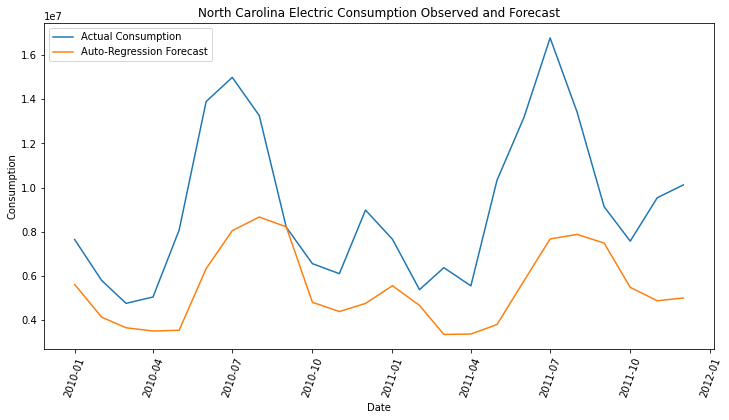

In [41]:
ar = AutoReg(y_train, lags=round(len(y_test)/2))
ar_fit = ar.fit()
y_ar_pred = ar_fit.predict(start=len(y_train), end=len(y_train)+len(y_test)-1, dynamic=False)
print(f'MAE:  {mean_absolute_error(y_test, y_ar_pred)}')
print(f'RMSE: {mean_squared_error(y_test, y_ar_pred, squared=False)}')

fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(y_test, label='Actual Consumption')
plt.plot(y_test.index, y_ar_pred, label='Auto-Regression Forecast')
plt.xticks(rotation=70)
plt.title('North Carolina Electric Consumption Observed and Forecast')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.legend(loc='best');
# plt.savefig('../images/electricity_auto_regression_forecast.png', bbox_inches='tight')